# Proyecto: Análisis de datos Uber


Importamos la base de datos que fue obtenida de Kaggle: https://www.kaggle.com/datasets/anupammajhi/uber-request-data

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Uber Request Data.csv to Uber Request Data.csv


Importamos las librerías necesarias, en este caso Pandas.

In [4]:
import pandas as pd
data = pd.read_csv("Uber Request Data.csv")
data.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


Imprimimos los primeros 5 registros de nuestra base de datos. Luego, podemos obtener la información de nuestra base de datos, para tener una idea general de ella.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Visualizamos la forma de nuestra base de datos.

In [6]:
data.shape

(6745, 6)

Primero queremos ver información sobre los puntos de recojo.

In [7]:
data["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

Los datos anteriores los podemos expresar en porcentajes.

In [11]:
 data["Pickup point"].value_counts("City") * 100
 data["Pickup point"].value_counts("Airport") * 100

City       51.99407
Airport    48.00593
Name: Pickup point, dtype: float64

Importamos La librería Matplotlib para graficar la data seleccionada.

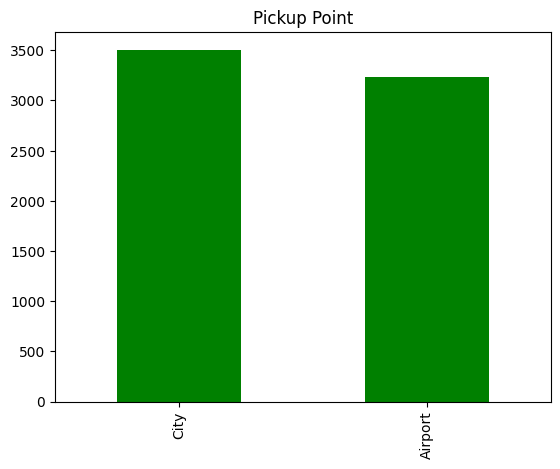

In [14]:
import matplotlib.pyplot as plt
data["Pickup point"].value_counts().plot.bar(color='green')
plt.title('Pickup Point')
plt.show()

Ahora analizamos la columna ID del conductor para saber cuántos viajes hace cada uno.

In [ ]:
data["Driver id"].value_counts()

27.0     22
176.0    21
177.0    21
84.0     21
22.0     21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: Driver id, Length: 300, dtype: int64

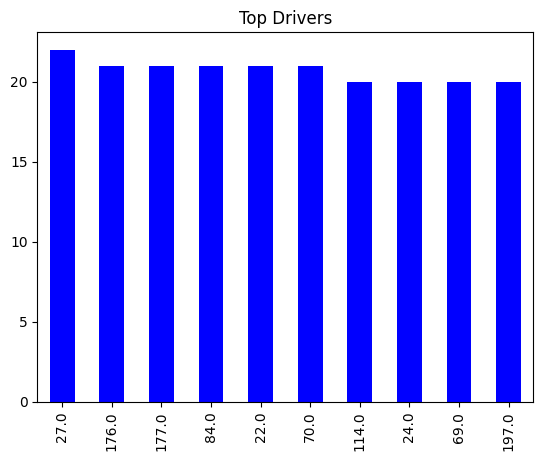

In [24]:
data["Driver id"].value_counts().head(10).plot.bar(color='blue')
plt.title('Top Drivers')
plt.show()

Agrupamos ID del conductor con Punto de recojo.

In [ ]:
data.groupby(["Driver id","Pickup point"]).size()

Driver id  Pickup point
1.0        Airport          7
           City             6
2.0        Airport          7
           City             6
3.0        Airport          8
                           ..
298.0      City            10
299.0      Airport          2
           City            10
300.0      Airport          4
           City             2
Length: 600, dtype: int64

Ahora analizamos el estado de los viajes.

In [ ]:
data["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [29]:
data["Status"].value_counts("Trip Completed") * 100
data["Status"].value_counts("No Cars Available") * 100
data["Status"].value_counts("Cancelled") * 100

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

Ahora buscamos saber el estado de los viajes por cada coductor

In [ ]:
data.groupby(["Driver id","Status"]).size()

Driver id  Status        
1.0        Cancelled          4
           Trip Completed     9
2.0        Cancelled          4
           Trip Completed     9
3.0        Cancelled          4
                             ..
298.0      Trip Completed    11
299.0      Cancelled          5
           Trip Completed     7
300.0      Cancelled          1
           Trip Completed     5
Length: 595, dtype: int64

In [ ]:
data.value_counts(["Driver id","Status"])

Driver id  Status        
22.0       Trip Completed    16
233.0      Trip Completed    15
184.0      Trip Completed    15
109.0      Trip Completed    14
69.0       Trip Completed    14
                             ..
252.0      Cancelled          1
265.0      Cancelled          1
23.0       Cancelled          1
26.0       Cancelled          1
41.0       Cancelled          1
Length: 595, dtype: int64

Ahora agrupamos por punto de recojo y estado.

In [ ]:
data.groupby(["Pickup point","Status"]).size()

Pickup point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
dtype: int64

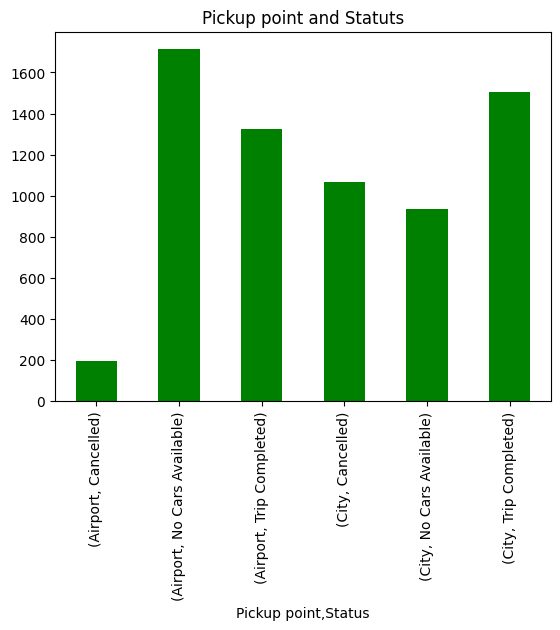

In [32]:
import matplotlib.pyplot as plt
data.groupby(["Pickup point","Status"]).size().plot.bar(color='green')
plt.title('Pickup point and Statuts')
plt.show()

Ahora queremos saber el porcentaje de viajes cancelados, sin auto disponible y completado  por punto de recojo.

In [37]:
TotalAirport = 198 + 1713 + 1327
TotalCity = 1066 + 937 + 1504
cancelledAirport = (198/TotalAirport)* 100
NocarsAirport = (1713/TotalAirport)* 100
completedAirport = (1327/TotalAirport)* 100
cancelledCity = (1066/TotalCity)* 100
NocarsCity = (937/TotalCity)* 100
completedCity = (1504/TotalCity)* 100
print(round(cancelledAirport,2))
print(round(NocarsAirport,2))
print(round(completedAirport,2))
print(round(cancelledCity,2))
print(round(NocarsCity,2))
print(round(completedCity,2))



6.11
52.9
40.98
30.4
26.72
42.89


Ahora queremos ver la duración del viaje.

In [ ]:
data["Request timestamp"] = pd.to_datetime(data["Request timestamp"], errors ='coerce')
data["Drop timestamp"] = pd.to_datetime(data["Drop timestamp"], errors ='coerce')
data["diff"] = data["Drop timestamp"] - data["Request timestamp"]
data["diff"].head(7)

0   0 days 01:09:00
1   0 days 00:50:00
2   0 days 00:41:00
3   0 days 00:55:00
4   0 days 00:52:31
5   0 days 00:31:31
6   0 days 00:57:43
Name: diff, dtype: timedelta64[ns]

Vemos la duración Máxima

In [ ]:
duration = data ["diff"]
duration.max()

Timedelta('29 days 01:15:00')

Ubicamos la duración mínima

In [ ]:
duration = data ["diff"]
duration.min()

Timedelta('-148 days +00:33:55')

Ahora encontramos el promedio de la duración de los viajes

In [ ]:
duration = data ["diff"]
duration.median()

Timedelta('0 days 00:52:05')

In [ ]:
duration = data ["diff"]
duration.value_counts()

0 days 00:49:00    40
0 days 00:38:00    36
0 days 00:51:00    36
0 days 00:56:00    32
0 days 00:41:00    31
                   ..
0 days 01:03:22     1
0 days 01:07:40     1
0 days 00:49:27     1
0 days 00:55:49     1
0 days 01:17:05     1
Name: diff, Length: 1348, dtype: int64